In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import scipy.stats as st
import statsmodels.api as sm
import matplotlib.mlab as mlab

In [2]:
df_principal = pd.read_csv(r"C:\Users\elodi\Documents\Data Analyst\P4\df_principal.csv")

### Mission n° 2
Ensuite, vous réaliserez l’analyse des données. Une grande liberté vous est laissée sur ce plan, mais à vous de trouver les informations qui ont du sens pour mieux comprendre les ventes.

Vous devrez y utiliser au moins :

des indicateurs de tendance centrale et de dispersion ;
une analyse de concentration, via une courbe de Lorenz et un indice de Gini ;
des représentations graphiques, dont au moins un histogramme, une représentation avec des "boîtes à moustaches", et une représentation de série temporelle (c’est-à-dire un graphique dont l’axe des abscisses représente des dates) ;
des analyses bivariées.

##### Evolution du chiffre d'affaires

In [3]:
df_principal.head()

,id_prod,date,session_id,client_id,price,categ,sex,birth,annee,mois,anneemois,age
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,f,1977,2021,4,20214,45
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,65.75,2.0,f,2000,2022,2,20222,22
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,10.71,1.0,f,1979,2021,9,20219,43
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,4.20,0.0,m,1963,2021,10,202110,59
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,8.99,0.0,f,1980,2021,7,20217,42


In [4]:
df_principal.dtypes

id_prod        object
date           object
session_id     object
client_id      object
price         float64
categ         float64
sex            object
birth           int64
annee           int64
mois            int64
anneemois       int64
age             int64
dtype: object

In [5]:
df_principal['date'] = pd.to_datetime(df_principal['date'])

In [6]:
ca_par_mois = df_principal.groupby(pd.Grouper(key='date', freq='M')).sum().reset_index()
ca_par_mois['chiffre_daffaires'] = ca_par_mois.price
ca_par_mois = ca_par_mois[['date', 'chiffre_daffaires']]
ca_par_mois

,date,chiffre_daffaires
0,2021-03-31,479312.03
1,2021-04-30,472980.72
2,2021-05-31,489367.95
3,2021-06-30,481257.94
4,2021-07-31,480898.66
5,2021-08-31,479305.19
6,2021-09-30,502771.28
7,2021-10-31,319159.96
8,2021-11-30,512890.17
9,2021-12-31,522937.68


In [7]:
ca_total = ca_par_mois['chiffre_daffaires'].sum()
print('Le chiffre d\'affaires sur l\'année 2021 est de : {0:,}'.format(ca_total))

Le chiffre d'affaires sur l'année 2021 est de : 5,796,577.769998947


In [8]:
#nombre de transactions
print(len(df_principal['date']))

336713


# 
Visualisation de l'évolution des ventes sur les 12 derniers mois

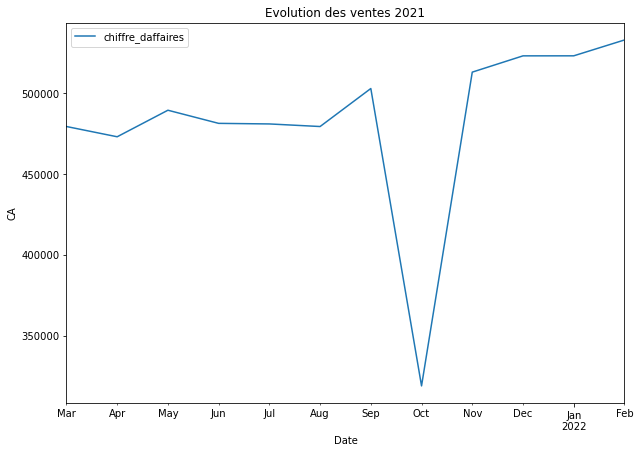

In [9]:
ca_par_mois.plot(x='date', y='chiffre_daffaires', figsize=(10 ,7))
plt.title('Evolution des ventes 2021')
plt.xlabel('Date')
plt.ylabel('CA')
plt.savefig('plot_CA.png')
plt.show()

##### On constate une baisse significative des ventes en Octobre 2021, alors que les ventes sont plutôt stables sur la dernière année. 

# 
Calcul du nombre de transactions pour le mois d'octobre et comparaison avec le mois de septembre 

In [10]:
transaction_octobre = len(df_principal[(df_principal.date > '2021-09-30') & \
                                      (df_principal.date < '2021-11-01')])
transaction_octobre

22888

In [11]:
transaction_septembre= len(df_principal[(df_principal.date > '2021-08-31') & \
                                        (df_principal.date < '2021-10-01')])
transaction_septembre

34074

In [12]:
df_principal[(df_principal.categ == 1) & (df_principal.date > '2021-10-02') & \
                                         (df_principal.date < '2021-10-28')]

,id_prod,date,session_id,client_id,price,categ,sex,birth,annee,mois,anneemois,age


# 
On constate aucune transaction sur la catégorie de produit 1 pour le mois d'octobre.
Ne sachant pas pourquoi il n'y a aucune vente sur la catégorie de produit 1 (erreur, données manquantes...), je supprime les valeurs du mois d'octobre pour la suite de l'analyse

In [13]:
df_principal = df_principal[(df_principal.date <= '2021-09-30') | (df_principal.date >= '2021-11-01')]

# 
Chiffre d'affaire selon l'age des clients 

In [14]:
ca_age = df_principal.groupby(pd.Grouper(key='age')).sum().reset_index()
ca_age['chiffre_daffaires'] = ca_age.price
ca_age = ca_age[['age', 'chiffre_daffaires']]
ca_age.sort_values(by='age', ascending=True, na_position='first', inplace=True)
ca_age

,age,chiffre_daffaires
40,18,277540.29
58,19,83070.37
49,20,84110.59
38,21,80605.93
1,22,75595.32
...,...,...
72,89,2453.63
43,90,2346.54
74,91,1308.66
75,92,1973.72


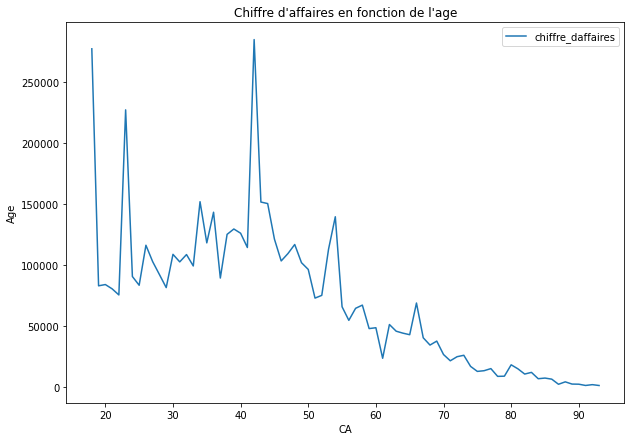

In [15]:
ca_age.plot(x='age', y='chiffre_daffaires', figsize=(10 ,7))
plt.title('Chiffre d\'affaires en fonction de l\'age')
plt.xlabel('CA')
plt.ylabel('Age')
plt.savefig('plot_ca_age.png')
plt.show()

# 
Chiffre d'affaire par catégorie

In [16]:
ca_categ = df_principal.groupby(pd.Grouper(key='categ')).sum().reset_index()
ca_categ['chiffre_daffaires'] = ca_categ.price
ca_categ = ca_categ[['categ', 'chiffre_daffaires']]
ca_categ.sort_values(by='categ', ascending=True, na_position='first', inplace=True)
ca_categ

,categ,chiffre_daffaires
0,0.0,2.020531e+06
2,1.0,2.206702e+06
1,2.0,1.232057e+06


#### Mesures de tendance centrale et de dispersion 

##### Repartition des prix par catégorie

--------------------
0.0
moy:
 10.649786585843907
med:
 9.99
mod:
 0    4.99
dtype: float64
var:
 24.335392257530714
ect:
 4.9330915517077845


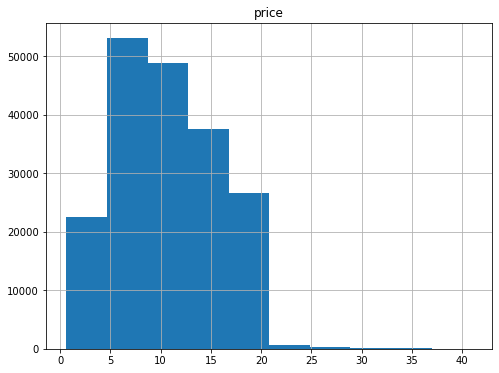

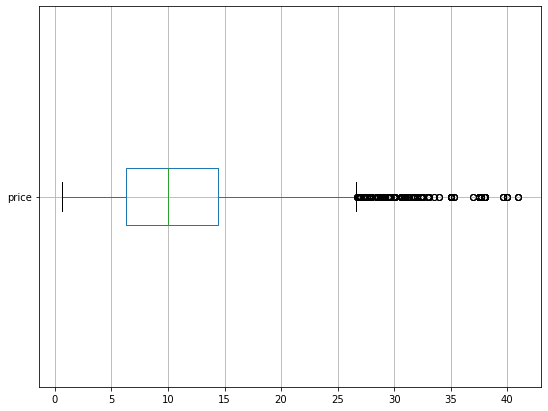

--------------------
2.0
moy:
 75.24933732363947
med:
 62.83
mod:
 0    68.99
dtype: float64
var:
 1537.1326210291204
ect:
 39.206282927983885


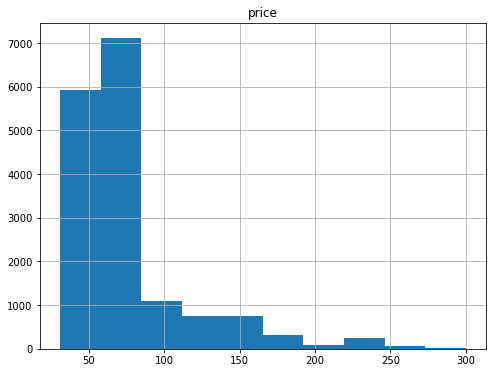

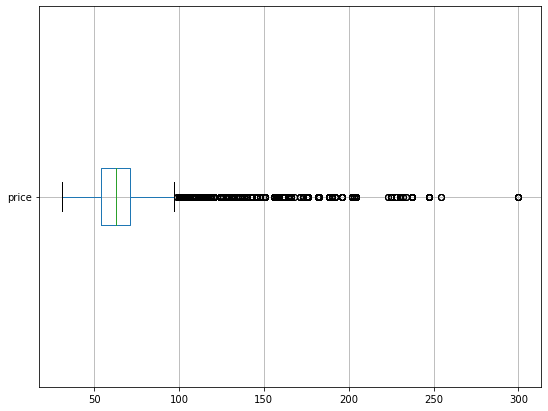

--------------------
1.0
moy:
 20.484202103468885
med:
 19.08
mod:
 0    15.99
dtype: float64
var:
 57.39794313581024
ect:
 7.576143025036568


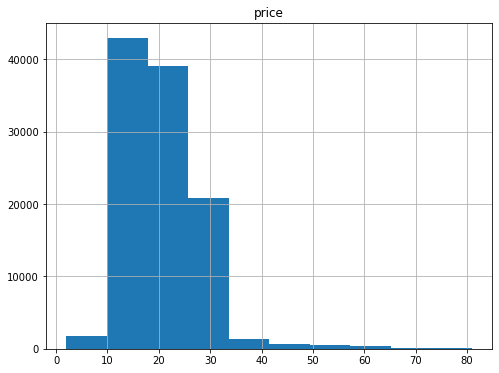

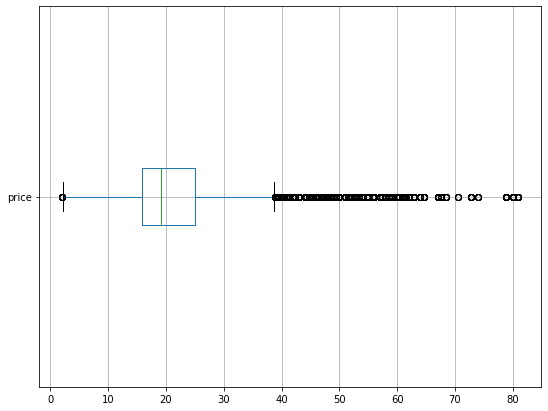

In [17]:
for cat in df_principal["categ"].unique():
    subset = df_principal[df_principal.categ == cat]
    print("-"*20)
    print(cat)
    print("moy:\n",subset['price'].mean())
    print("med:\n",subset['price'].median())
    print("mod:\n",subset['price'].mode())
    print("var:\n",subset['price'].var(ddof=0))
    print("ect:\n",subset['price'].std(ddof=0))
    subset.hist(column="price",figsize=(8 ,6))
    plt.savefig('hist_mesures_0.png')
    plt.savefig('hist_mesures_2.png')
    plt.savefig('hist_mesures_1.png')
    plt.show()
    subset.boxplot(column="price", vert=False, figsize=(9 ,7))
    plt.savefig('boxplt_mesures_0.png')
    plt.savefig('boxplt_mesures_2.png')
    plt.savefig('boxplt_mesures_1.png')
    plt.show()

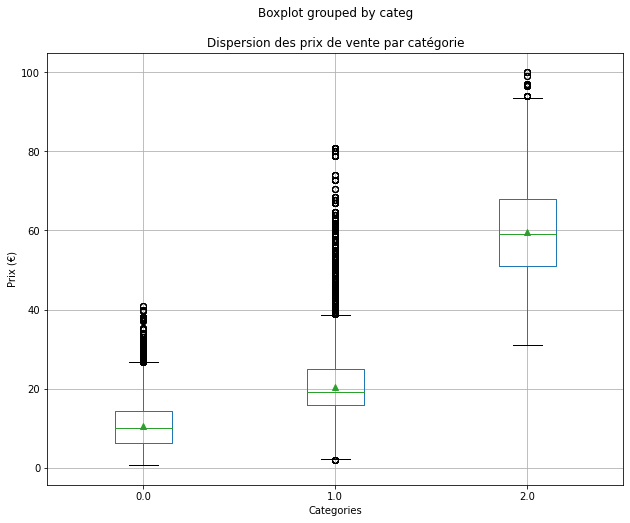

In [18]:
subset = df_principal[df_principal.price < 100]
subset.boxplot(column='price', by='categ', showmeans=True, figsize=(10 , 8))
plt.title('Dispersion des prix de vente par catégorie')
plt.xlabel('Categories')
plt.ylabel('Prix (€)')
plt.savefig('boxplot_prix_cat.png')
plt.show()

In [19]:
X = "categ" 
Y = "price" 

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
round(eta_squared(df_principal.categ, df_principal.price), 2)

0.64

#### Repartition des prix

In [20]:
print(df_principal['price'].mean())
print(df_principal['price'].median())
print(df_principal['price'].mode())
print(df_principal['price'].var(ddof=0))
print(df_principal['price'].std(ddof=0))

17.39596845382645
13.99
0    15.99
dtype: float64
320.0204777640948
17.889116181748467


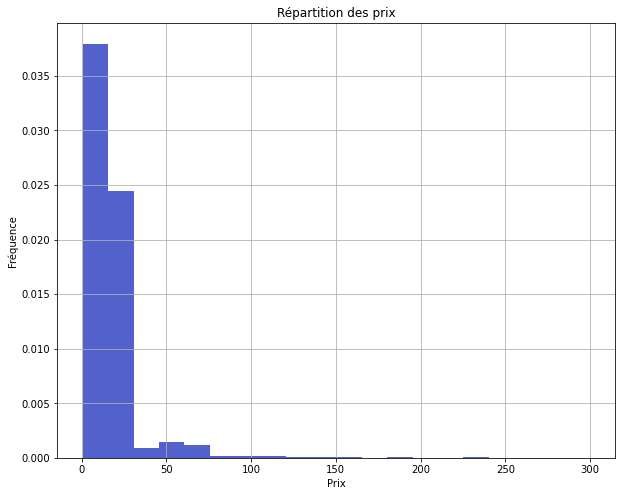

In [21]:
df_principal['price'].hist(color='#5361cd', alpha=1, density=True, bins=20, figsize=(10,8))
plt.title('Répartition des prix')
plt.xlabel('Prix')
plt.ylabel('Fréquence')
plt.savefig('hist_prix_repartition.png')
plt.show()

C:\Users\elodi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


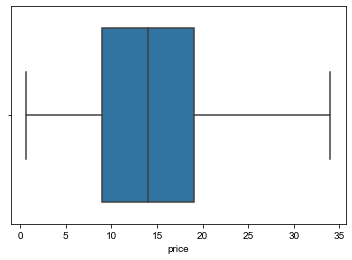

<Figure size 648x504 with 0 Axes>

In [22]:
sns.boxplot(df_principal['price'], showfliers=False,)
sns.set(style="darkgrid")
plt.figure(figsize=(9, 7))
plt.savefig('boxplt_prix_repartition.png')
plt.show()

#### Repartition des produits par catégories 

In [23]:
effectif = df_principal['categ'].value_counts()
modalite = effectif.index 
tab = pd.DataFrame(modalite, columns = ['categ'])
tab["n"] = effectif.values
tab["f"] = tab["n"] / len(df_principal) 
tab

,categ,n,f
0,0.0,189725,0.604557
1,1.0,107727,0.343271
2,2.0,16373,0.052172


In [24]:
tab = tab.sort_values("categ")
tab["F"] = tab["f"].cumsum()
tab

,categ,n,f,F
0,0.0,189725,0.604557,0.604557
1,1.0,107727,0.343271,0.947828
2,2.0,16373,0.052172,1.000000


<ipython-input-25-2e0608e2d0be>:5: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)


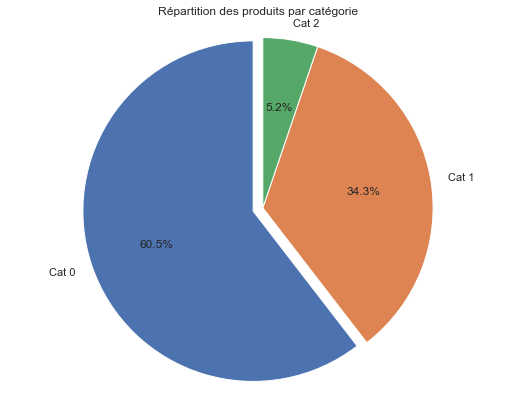

In [25]:
labels = 'Cat 0', 'Cat 1', 'Cat 2'
sizes = tab['f']
explode = (0.06, 0, 0)
fig1, ax1 = plt.subplots(figsize=(9,7))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)
ax1.axis('equal') 
plt.title('Répartition des produits par catégorie')
plt.savefig('subplots_cat_repartition.png')
plt.show()

##### Mesure de concentration : prix
Courbe de Lorenz 

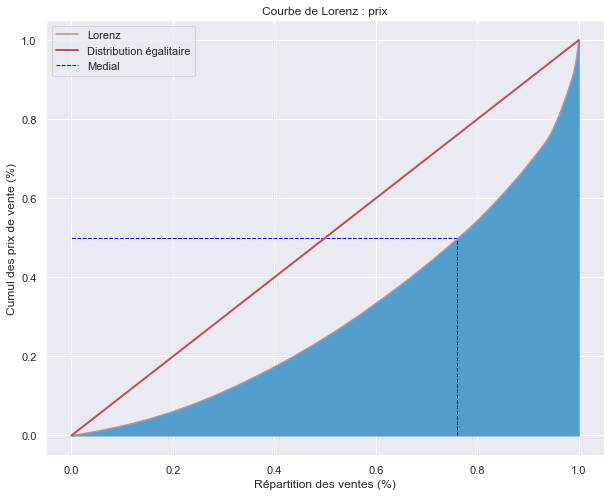

In [26]:
price = df_principal['price'].values
lorenz_price = np.cumsum(np.sort(price)) / price.sum()
fig, ax = plt.subplots(figsize=(10, 8))
plt.plot(np.linspace(0,1,len(lorenz_price)), lorenz_price, drawstyle='steps-post', color='rosybrown', label='Lorenz')
plt.fill_between(np.linspace(0,1,len(lorenz_price)) ,lorenz_price , color='#539ecd')
plt.plot([0, 1], [0, 1], 'r-', lw=2, label='Distribution égalitaire')
plt.vlines(x=.76, ymin=0, ymax=.5, color='blue', linestyle='--', linewidth=1, label='Medial')
plt.hlines(xmin=.76, xmax=0, y=.5, color='blue', linestyle='--', linewidth=1)
plt.title('Courbe de Lorenz : prix')
plt.xlabel("Répartition des ventes (%)")
plt.ylabel("Cumul des prix de vente (%)")
plt.legend(loc="best")
plt.savefig('plot_lorenz_prix.png')
plt.show()

In [27]:
AUC = lorenz_price[:-1].sum()/len(lorenz_price)  
S = 0.5 - AUC 
gini_price = 2*S 
gini_price
print("L'indice de Gini est de : {}".format(gini_price))

L'indice de Gini est de : 0.39017445138386897


# 
Repartition des ages (histogramme) 

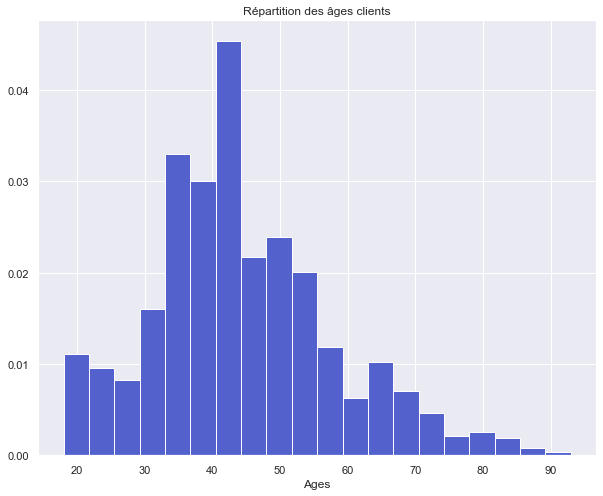

In [28]:
df_principal['age'].hist(color='#5361cd', alpha=1, density=True, bins=20, figsize=(10,8))
plt.xlabel('Ages')
plt.title('Répartition des âges clients')
plt.savefig('repartition_age.png')
plt.show()

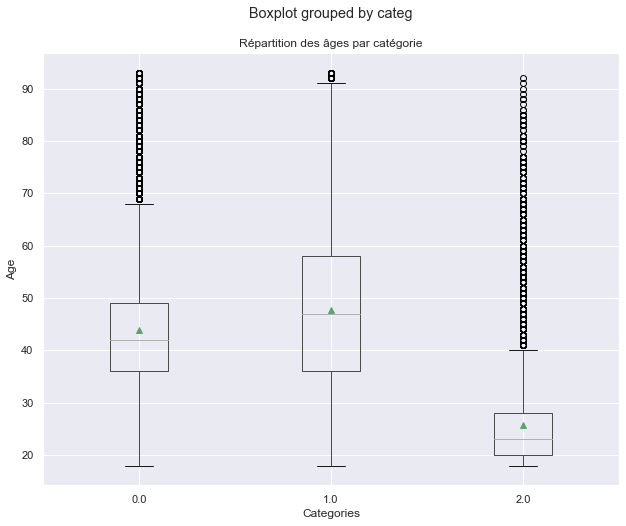

In [29]:
subset = df_principal[df_principal.price < 100]
subset.boxplot(column='age', by='categ', showmeans=True, figsize=(10 , 8))
plt.title('Répartition des âges par catégorie')
plt.xlabel('Categories')
plt.ylabel('Age')
plt.savefig('boxplot_age_cat.png')
plt.show()

# 
Calcul eta carré 

In [30]:
X = "categ" 
Y = "age" 

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
round(eta_squared(df_principal.categ, df_principal.age), 2)

0.12

# 
Répartition age selon prix (nuage de point)

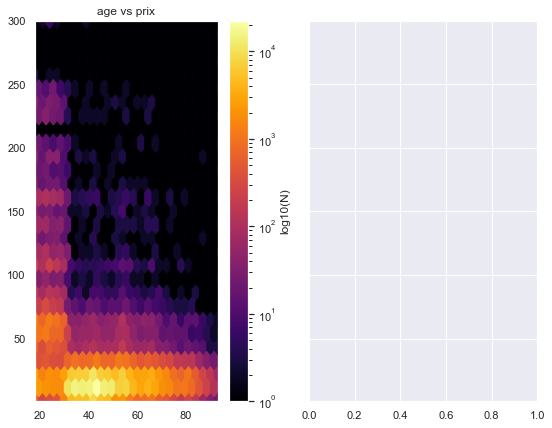

In [31]:
x = df_principal['age']
y = df_principal['price']
xmin = x.min()
xmax = x.max()
ymin = y.min()
ymax = y.max()


fig, axs = plt.subplots(ncols=2, sharey=True, figsize=(9, 7))
ax = axs[0]
hb = ax.hexbin(x, y, gridsize=25, bins='log', cmap='inferno')
ax.axis([xmin, xmax, ymin, ymax])
ax.set_title("age vs prix")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('log10(N)')
plt.savefig('age_prix.png')
plt.show()

# 
Répartition sex selon catégorie

In [32]:
df_categ_sex = df_principal.pivot_table(index='sex', columns='categ', values='price', aggfunc=sum).reset_index()

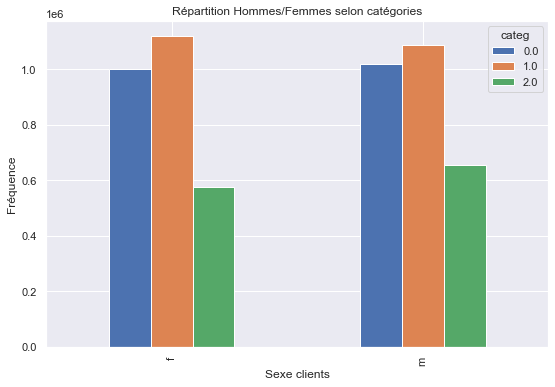

In [33]:
df_categ_sex.plot(kind='bar', x='sex', figsize=(9, 6))
plt.title('Répartition Hommes/Femmes selon catégories')
plt.xlabel('Sexe clients')
plt.ylabel('Fréquence')
plt.savefig("categ_sex.png")
plt.show()

#### Mission n° 3
Voici quelques questions supplémentaires, que votre manager vous a posées :

Y a-t-il une corrélation entre le sexe des clients et les catégories de produits achetés ? Y a-t-il une corrélation entre l'âge des clients et : Le montant total des achats ; La fréquence d’achat (ie. nombre d'achats par mois par exemple) ; La taille du panier moyen (en nombre d’articles) ; Les catégories de produits achetés.

# 
Analyse de la corrélation entre le sexe des clients et les catégories de produits achetés

In [34]:
#Création du tableau de contingence "Matrice des valeurs observées"
X = 'sex'
Y = 'categ'

#Calcul du tableau de contigence par la méthode .pivot_table()
c = df_principal[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len) 
tx = df_principal[X].value_counts()
ty = df_principal[Y].value_counts()

cont = c.copy()
cont

categ,0.0,1.0,2.0
sex,,,
f,94218,54497,7693
m,95507,53230,8680


In [35]:
#Création de la "Matrice des valeurs attendues"
tx_df_principal= pd.DataFrame(tx)
ty_df_principal = pd.DataFrame(ty)

tx_df_principal.columns = ["s"]
ty_df_principal.columns = ["s"]

n = len(df_principal)

#Produit matriciel. On utilise pd.T pour pivoter une des deux séries.
indep = (tx_df_principal.dot(ty_df_principal.T) / n)
indep

,0.0,1.0,2.0
m,95167.498845,54036.680185,8212.82097
f,94557.501155,53690.319815,8160.17903


In [36]:
#Matrice "écart au carré normalisé de la valeur attendue VS valeur observée"
mesure = (c-indep)**2/indep
mesure

categ,0.0,1.0,2.0
f,1.218952,12.120116,26.746502
m,1.211139,12.042430,26.575064


In [37]:
#Calcul du Chi2
chi2 = mesure.sum().sum()
chi2

79.91420286628872

# 
HeatMap 

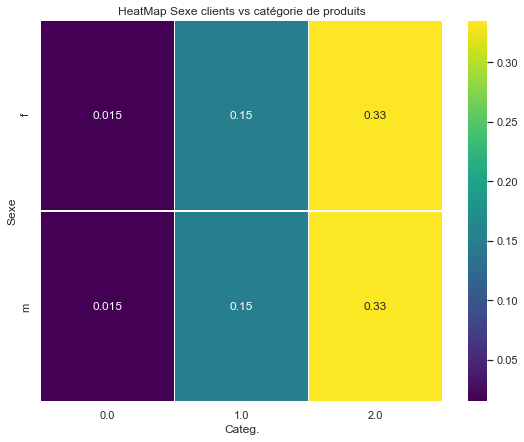

In [38]:
table = (mesure/chi2)
fig, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(table, annot=True, cmap="viridis", linewidths=0.1)
plt.title('HeatMap Sexe clients vs catégorie de produits')
plt.xlabel('Categ.')
plt.ylabel('Sexe')
plt.savefig('sexe_categ.png')
plt.show()

# 
Analyse de la corrélation entre l'âge clients et la fréquence d'achat

In [39]:
#Hypothèse 1 id_session = 1 transation
customers_freq = df_principal.groupby('age').count().reset_index()
customers_freq = customers_freq[['age', 'session_id']]
#Création d'une variable fréquence 'f'
customers_freq['f'] = customers_freq['session_id'] / sum(customers_freq['session_id'])
customers_freq.sort_values(by='age', ascending=False).head(10)

,age,session_id,f
75,93,84,0.000268
74,92,111,0.000354
73,91,78,0.000249
72,90,141,0.000449
71,89,150,0.000478
70,88,255,0.000813
69,87,132,0.000421
68,86,379,0.001208
67,85,434,0.001383
66,84,416,0.001326


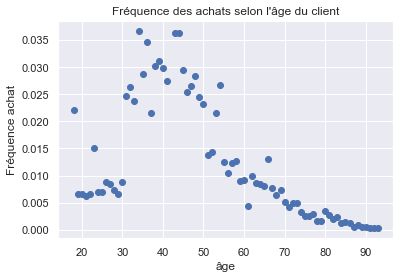

In [40]:
plt.plot(customers_freq[customers_freq.f < .05].age, customers_freq[customers_freq.f < .05].f, 'o')
plt.xlabel('âge')
plt.ylabel('Fréquence achat')
plt.title('Fréquence des achats selon l\'âge du client')
plt.savefig('frequence_age.png')
plt.show()

# 
Coefficient de corrélation linéaire de Pearson

In [41]:
coef_customers_freq = st.pearsonr(customers_freq.age, customers_freq.f)[0]
coef_customers_freq

-0.5321182987672953

# 
Corrélation confirmée par le coefficient de Pearson, il existe bien un lien entre l'âge des clients et leurs fréquences d'achat. 

# 
Analyse de la corrélation entre l'âge clients et la taille du panier moyen

In [42]:
customers_shop_prix = df_principal.groupby(['age', 'session_id']).count().reset_index()
customers_shop_prix = customers_shop_prix.groupby('age').mean().reset_index()
customers_shop_prix = customers_shop_prix[['age', 'price']]

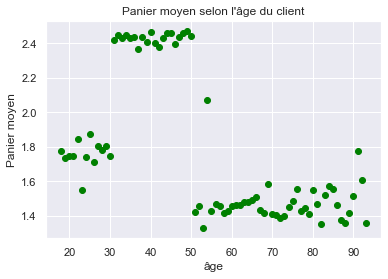

In [43]:
plt.plot(customers_shop_prix.age, customers_shop_prix.price, 'o', color='green')
plt.xlabel('âge')
plt.ylabel('Panier moyen')
plt.title('Panier moyen selon l\'âge du client')
plt.savefig('panier_moyen_age.png')
plt.show()

# 
Coefficient de corrélation linéaire de Pearson

In [44]:
coef_customers_shop = st.pearsonr(customers_shop_prix.age, customers_shop_prix.price)
coef_customers_shop

(-0.576913648092694, 4.905833323312488e-08)

# 
Le test de corrélation démontre un lien entre l'âge du client et le panier moyen. La linéarité de la corrélation existe mais selon un corps de clients distincts (Tranches d'âges : 3 clusters de clients)

# 
Analyse de la corrélation entre l'âge clients (par tranche d'age) et la catégorie de produi

In [45]:
# Création des tranches d'âge
def class_age(x):
    if x <= 30:
        return '18-30'
    
    elif x > 30 and x <= 45:
        return '30-45'
    
    elif x > 45 and x <= 60:
        return '45-60'
    
    elif x > 60 and x <= 75:
        return '60-75'
    
    elif x > 75 and x <= 90:
        return '75-90'
    
    elif x > 90:
        return '90+'
    
df_principal['class_age'] = df_principal['age'].apply(lambda x: class_age(x))

In [46]:
age_categ = df_principal.groupby(['class_age', 'categ']).count().reset_index()
age_categ = age_categ[['class_age', 'categ', 'session_id']]

In [47]:
df_categ_age = age_categ.pivot_table(index='class_age', columns='categ', values='session_id', aggfunc=sum).reset_index()

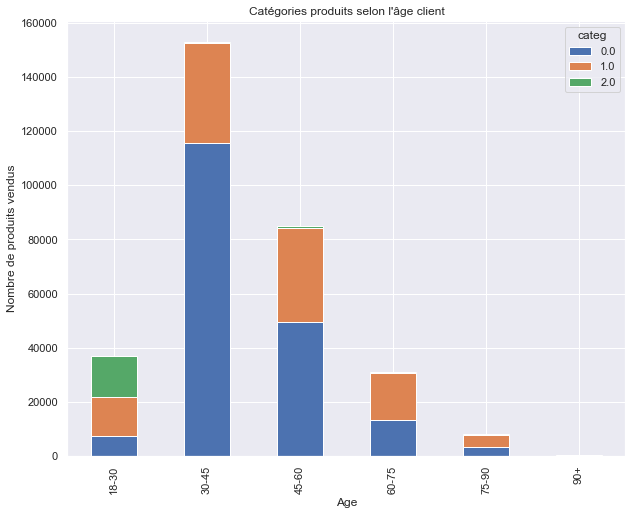

In [48]:
df_categ_age.plot(kind='bar', x='class_age',stacked=True, figsize=(10, 8))
plt.title('Catégories produits selon l\'âge client')
plt.xlabel('Age')
plt.ylabel('Nombre de produits vendus')
plt.savefig("categ_sex.png")
plt.show()

In [49]:
#Coefficient de corrélation eta carré
X = "session_id"
Y = "class_age" 

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

In [50]:
round(eta_squared(age_categ.class_age, age_categ.session_id), 2)

0.4